In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import keras
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [96]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X_train_full = train.iloc[:, 1:]
X_train_full = X_train_full.values.reshape((-1, 28, 28, 1))
y_train_full = train.iloc[:, 0]

In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [144]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=15,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.3,
                                  zoom_range = 0.3)
valid_datagen = ImageDataGenerator(rescale=1./255)

traingen = train_datagen.flow(X_train, y_train, batch_size=32)
validgen = valid_datagen.flow(X_train, y_train, batch_size=32)
# tmp = X_train[0].reshape((1,) + X_train[0].shape)

# for batch in train_datagen.flow(tmp, batch_size=1, save_prefix='tmp', save_format='png'):
#     i += 1
#     if i > 10: 
#         break

In [145]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [146]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [154]:
best_model_cb = keras.callbacks.ModelCheckpoint("MNIST_bestacc.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy',restore_best_weights=True)

In [155]:
history = model.fit_generator(traingen,epochs=100, validation_data = validgen,
                              callbacks=[best_model_cb, early_stopping_cb])

Epoch 1/100
985/985 [==============================] - 17s 17ms/step - loss: 0.0701 - accuracy: 0.9836 - val_loss: 0.0287 - val_accuracy: 0.9933
Epoch 2/100
985/985 [==============================] - 17s 17ms/step - loss: 0.0685 - accuracy: 0.9851 - val_loss: 0.0183 - val_accuracy: 0.9959
Epoch 3/100
985/985 [==============================] - 17s 17ms/step - loss: 0.0814 - accuracy: 0.9834 - val_loss: 0.0202 - val_accuracy: 0.9947
Epoch 4/100
985/985 [==============================] - 17s 18ms/step - loss: 0.0687 - accuracy: 0.9854 - val_loss: 0.0268 - val_accuracy: 0.9926
Epoch 5/100
985/985 [==============================] - 17s 17ms/step - loss: 0.0706 - accuracy: 0.9855 - val_loss: 0.0244 - val_accuracy: 0.9952
Epoch 6/100
985/985 [==============================] - 17s 18ms/step - loss: 0.0710 - accuracy: 0.9844 - val_loss: 0.0218 - val_accuracy: 0.9951
Epoch 7/100
985/985 [==============================] - 16s 17ms/step - loss: 0.0622 - accuracy: 0.9860 - val_loss: 0.0258 - val_ac

(0.0, 1.0)

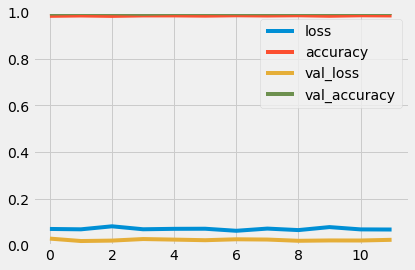

In [156]:
pd.DataFrame(history.history).plot()
plt.ylim([0,1])

In [159]:
y_pred = model.predict_proba(X_train[:3])
print(y_train[:3])
print(y_pred.round(2))

27884    4
36015    2
8003     4
Name: label, dtype: int64
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [161]:
test = test/255
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
test = test.values.reshape((-1, 28, 28, 1))
y_pred = model.predict_classes(test)
result = pd.DataFrame({'ImageID':range(1, len(y_pred)+1), 'Label':y_pred})

In [165]:
result.to_csv("MNIST.csv", index=False)